## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [3]:
dataset = pd.read_csv("Mall_Customers.csv")
X = dataset.iloc[:, -2:].values

## Using the elbow method to find the optimal number of clusters

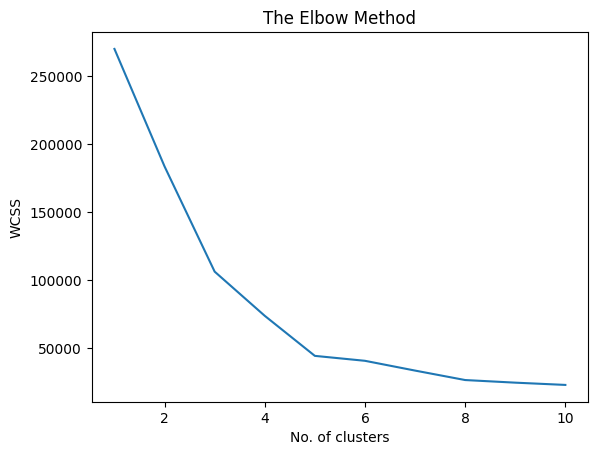

In [4]:
from sklearn.cluster import KMeans

# the graph of the elbow method, x is no. of clusters, y is wcss (within cluster sum of squares)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_) 

plt.plot(range(1,11), wcss)
plt.title("The Elbow Method")   
plt.xlabel("No. of clusters")
plt.ylabel("WCSS")
plt.show()

## Training the K-Means model on the dataset

In [6]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)

# with predict we build a new column, a dependent variable, whose value is which cluster the observation takes

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


## Visualising the clusters

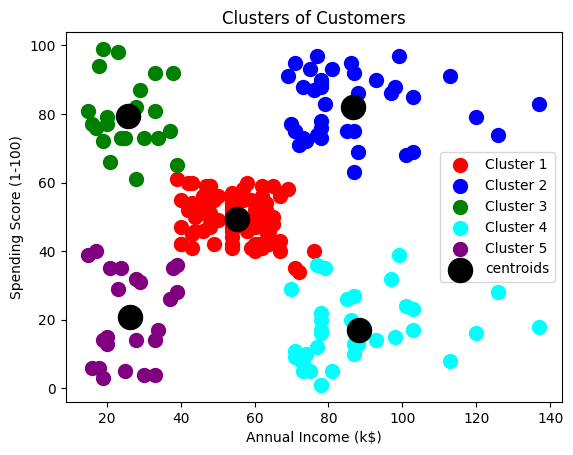

In [16]:
# plotting the clusters
plt.scatter(X[y_kmeans == 0,0], X[y_kmeans == 0, 1], s = 100, c='red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1,0], X[y_kmeans == 1, 1], s = 100, c='blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2,0], X[y_kmeans == 2, 1], s = 100, c='green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3,0], X[y_kmeans == 3, 1], s = 100, c='cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4,0], X[y_kmeans == 4, 1], s = 100, c='purple', label = 'Cluster 5')

#plotting the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='black', label='centroids')

# finishing up
plt.title("Clusters of Customers")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()